# Forecasting Airlines Datasets using various models

In [1]:
import pandas as pd
import numpy as np


In [2]:
air=pd.read_excel("C:\\Users\\Hi\\Desktop\\Python Datasets\\Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)

In [3]:
air

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


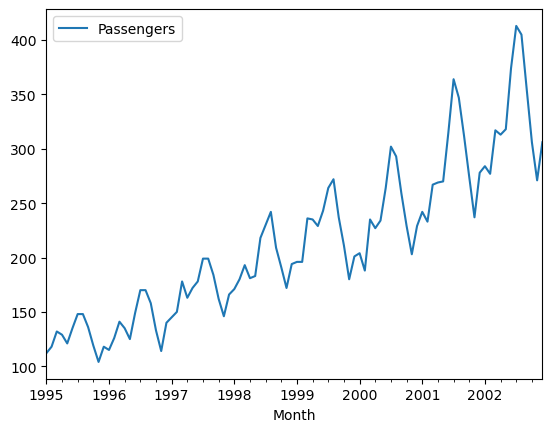

In [4]:
#Line Plot
import matplotlib.pyplot as plt
air.plot()
plt.show()

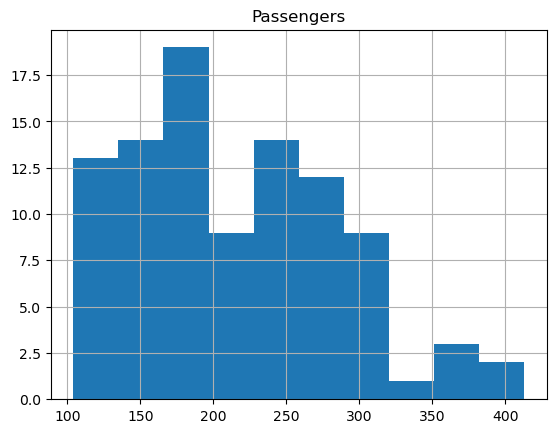

In [5]:
#Histogram Plot
air.hist()
plt.show()

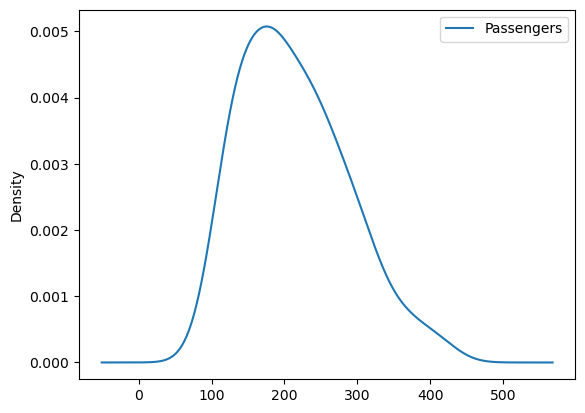

In [6]:
#Density Plot
air.plot(kind='kde')
plt.show()

c:\Users\Hi\anaconda3\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

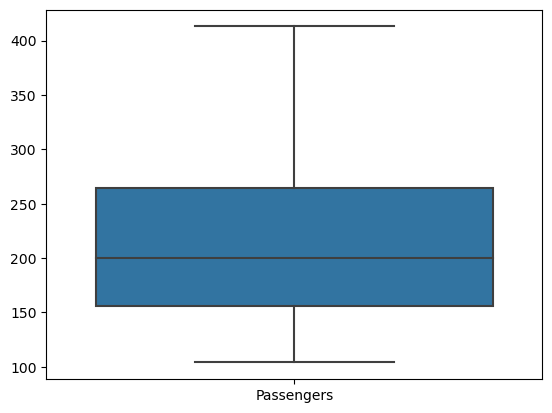

In [7]:
#Box Plot
import seaborn as sns
sns.boxplot(air)

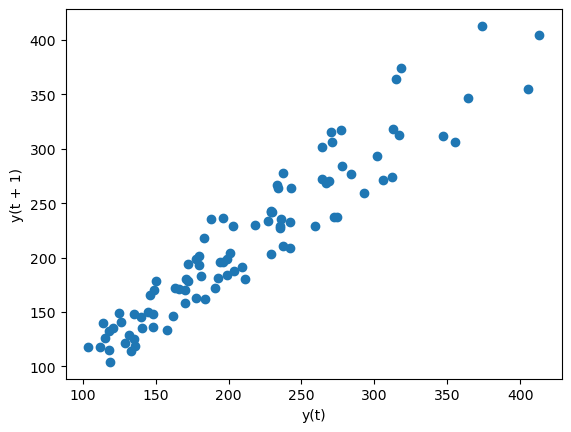

In [8]:
#Lag Plot
from pandas.plotting import lag_plot
lag_plot(air)
plt.show()

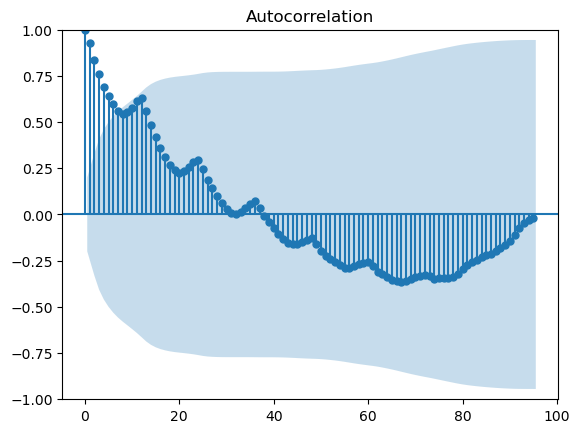

In [9]:
#AutoCorrelation Function ACF PLOT
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(air,lags=95)
plt.show()


# We are Going to use Model Based Methods here

In [10]:
air=pd.read_excel("C:\\Users\\Hi\\Desktop\\Python Datasets\\Airlines+Data.xlsx")
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [11]:
air["Date"] = pd.to_datetime(air.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

air["month"] = air.Date.dt.strftime("%b") # month extraction
air["year"] = air.Date.dt.strftime("%Y") # year extraction
air

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002
92,2002-09-01,355,2002-09-01,Sep,2002
93,2002-10-01,306,2002-10-01,Oct,2002
94,2002-11-01,271,2002-11-01,Nov,2002


In [12]:
air.shape

(96, 5)

In [13]:
#Splitting Dataset
train=air.head(65)
test=air.tail(31)

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

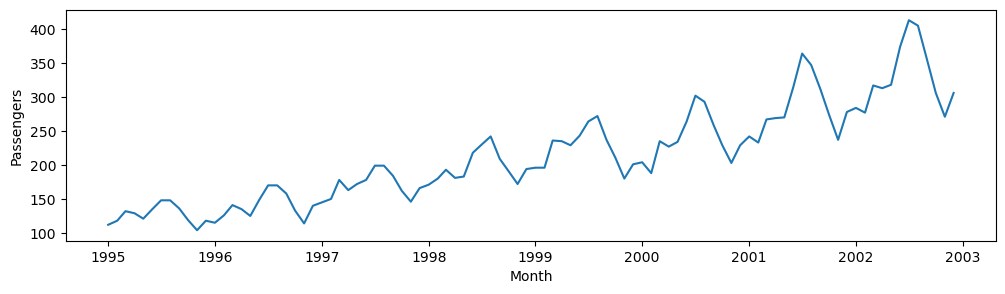

In [14]:
plt.figure(figsize=(12,3)) #we are taking ASPECT RATIO=0.25
sns.lineplot(x='Month',y='Passengers',data=air)

## Linear Model

In [15]:
air['t']=np.arange(len(air))
train=air.head(65)
test=air.tail(31)

In [16]:
import statsmodels.formula.api as smf
linear_model=smf.ols('Passengers~t',data=train).fit()
predict_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean(np.array(test['Passengers']-np.array(predict_linear))**2))
rmse_linear

50.61903311557762

## Exponential model

In [17]:
air['log_Passengers']=np.log(air['Passengers'])
air

,Month,Passengers,Date,month,year,t,log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,0,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,1,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,2,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,3,4.859812
4,1995-05-01,121,1995-05-01,May,1995,4,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,91,6.003887
92,2002-09-01,355,2002-09-01,Sep,2002,92,5.872118
93,2002-10-01,306,2002-10-01,Oct,2002,93,5.723585
94,2002-11-01,271,2002-11-01,Nov,2002,94,5.602119


In [18]:
train=air.head(65)
test=air.tail(31)

In [19]:
expo_model=smf.ols('log_Passengers~t',data=train).fit()
predict_expo=pd.Series(expo_model.predict(pd.DataFrame(test['t'])))
rmse_expo=np.sqrt(np.mean(np.array(test['log_Passengers'])-np.array(predict_expo))**2)
rmse_expo

0.006701241774717204

## Quadratic Model

In [20]:
air['t_square']=np.square(air['t'])
air

,Month,Passengers,Date,month,year,t,log_Passengers,t_square
0,1995-01-01,112,1995-01-01,Jan,1995,0,4.718499,0
1,1995-02-01,118,1995-02-01,Feb,1995,1,4.770685,1
2,1995-03-01,132,1995-03-01,Mar,1995,2,4.882802,4
3,1995-04-01,129,1995-04-01,Apr,1995,3,4.859812,9
4,1995-05-01,121,1995-05-01,May,1995,4,4.795791,16
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,91,6.003887,8281
92,2002-09-01,355,2002-09-01,Sep,2002,92,5.872118,8464
93,2002-10-01,306,2002-10-01,Oct,2002,93,5.723585,8649
94,2002-11-01,271,2002-11-01,Nov,2002,94,5.602119,8836


In [21]:
train=air.head(65)
test=air.tail(31)

In [22]:
quad_model=smf.ols('Passengers~t+t_square',data=train).fit()
predict_quad=pd.Series(quad_model.predict(pd.DataFrame(test[['t','t_square']])))
rmse_quad=np.sqrt(np.mean(np.array(test['Passengers'])-np.array(predict_quad))**2)
rmse_quad

32.19516134643734

## Additive Seasonality


In [23]:
air=pd.get_dummies(air,columns=['month'])

In [24]:
air['Jan']=air['month_Jan']
air['Feb']=air['month_Feb']
air['Mar']=air['month_Mar']
air['Apr']=air['month_Apr']
air['May']=air['month_May']
air['Jun']=air['month_Jun']
air['Jul']=air['month_Jul']
air['Aug']=air['month_Aug']
air['Sep']=air['month_Sep']
air['Oct']=air['month_Oct']
air['Nov']=air['month_Nov']
air['Dec']=air['month_Dec']
#air.drop(air['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec'],axis=1)
air=air.drop(air.iloc[:,7:19],axis=1)
air

,Month,Passengers,Date,year,t,log_Passengers,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1995-01-01,1995,0,4.718499,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,1995,1,4.770685,1,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,1995,2,4.882802,4,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,1995-04-01,1995,3,4.859812,9,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,1995,4,4.795791,16,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,2002,91,6.003887,8281,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,2002-09-01,2002,92,5.872118,8464,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,2002-10-01,2002,93,5.723585,8649,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,2002-11-01,2002,94,5.602119,8836,0,0,0,0,0,0,0,0,0,0,1,0


In [25]:
train=air.head(65)
test=air.tail(31)

In [26]:
ads_model=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predict_ads=pd.Series(ads_model.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse_ads=np.sqrt(np.mean(np.array(test['Passengers'])-np.array(predict_ads))**2)
rmse_ads

118.23655913978499

## Additive Seasonality Quadratic

In [27]:
ads_quad_model=smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predict_ads_quad=pd.Series(ads_quad_model.predict(pd.DataFrame(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse_ads_quad=np.sqrt(np.mean(np.array(test['Passengers'])-np.array(predict_ads_quad))**2)
rmse_ads_quad

24.26238555028463

## Multiplicative Seasonality

In [28]:
mul_sea_model=smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predict_mul_sea=pd.Series(mul_sea_model.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_mul_sea=np.sqrt(np.mean(np.array(test['log_Passengers'])-np.array(np.exp(predict_mul_sea)))**2)
rmse_mul_sea

166.39257784304104

## Multiplicative Additive Seasonality

In [29]:
mul_add_sea_model=smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predict_mul_add_sea=pd.Series(mul_add_sea_model.predict(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_mul_add_sea=np.sqrt(np.mean(np.array(test['log_Passengers'])-np.array(np.exp(predict_mul_add_sea)))**2)
rmse_mul_add_sea

295.36937441207147

In [30]:
from tabulate import tabulate
table=[['Model','RMSE_Values'],['LINEAR',rmse_linear],['EXPONENTIAL',rmse_expo],['QUADRATIC',rmse_quad],['ADDITIVE SEASONALITY',rmse_ads],
['ADDITIVE SEASONALITY QUADRATIC',rmse_ads_quad],['MULTIPLICATIVE SEASONALITY',rmse_mul_sea],['MULTIPLICATIVE ADDITIVE SEASONALITY',rmse_mul_add_sea]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════════════════════╤═══════════════╕
│ Model                               │   RMSE_Values │
╞═════════════════════════════════════╪═══════════════╡
│ LINEAR                              │   50.619      │
├─────────────────────────────────────┼───────────────┤
│ EXPONENTIAL                         │    0.00670124 │
├─────────────────────────────────────┼───────────────┤
│ QUADRATIC                           │   32.1952     │
├─────────────────────────────────────┼───────────────┤
│ ADDITIVE SEASONALITY                │  118.237      │
├─────────────────────────────────────┼───────────────┤
│ ADDITIVE SEASONALITY QUADRATIC      │   24.2624     │
├─────────────────────────────────────┼───────────────┤
│ MULTIPLICATIVE SEASONALITY          │  166.393      │
├─────────────────────────────────────┼───────────────┤
│ MULTIPLICATIVE ADDITIVE SEASONALITY │  295.369      │
╘═════════════════════════════════════╧═══════════════╛


# Exponential model has the lowest RMSE value

<AxesSubplot:>

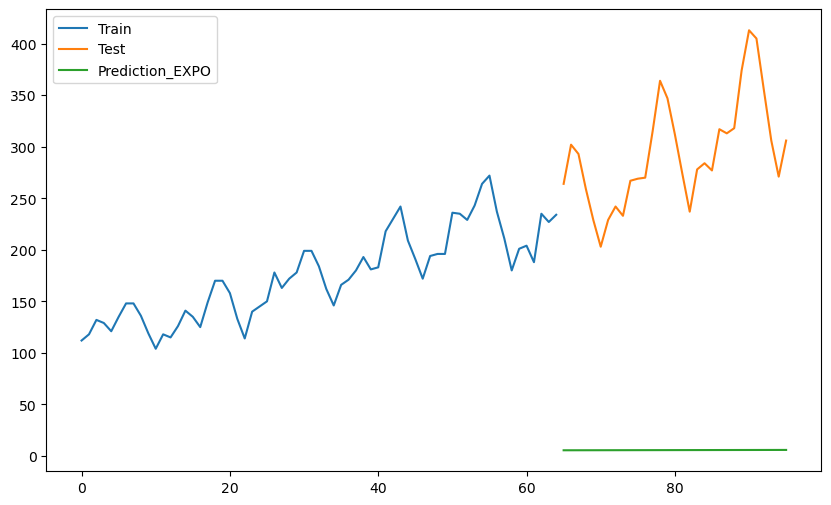

In [31]:
train.Passengers.plot(legend=True,label='Train',figsize=(10,6))
test.Passengers.plot(legend=True,label='Test')
predict_expo.plot(legend=True,label='Prediction_EXPO')

# Data Driven Models

## Moving Average

In [32]:
air=pd.read_excel("C:\\Users\\Hi\\Desktop\\Python Datasets\\Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)
air

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


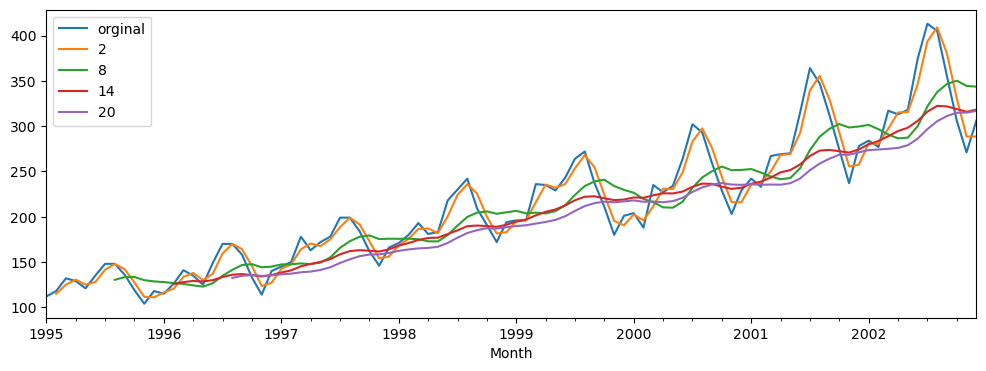

In [33]:
plt.figure(figsize=(12,4))
air.Passengers.plot(label='orginal')
for i in range(2,26,6):
    air['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Time Series Decomposition Plot


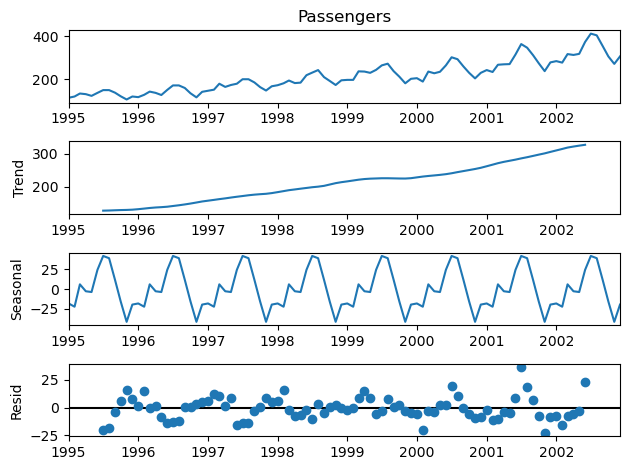

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_add_sea=seasonal_decompose(air.Passengers,period=12)
decompose_add_sea.plot()
plt.show()

## AutoCorrelation Function (ACF) plot and Partial AutoCorrection Function (PACF) Plot


c:\Users\Hi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


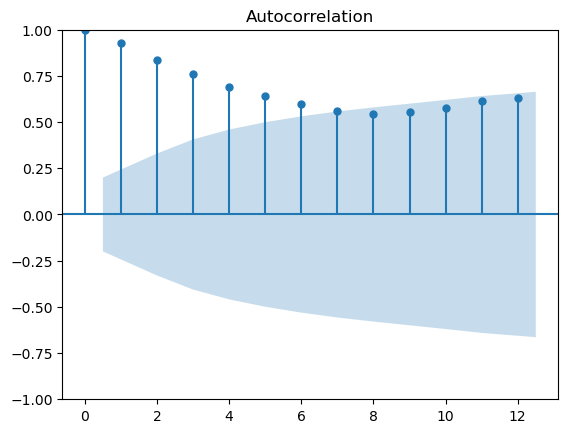

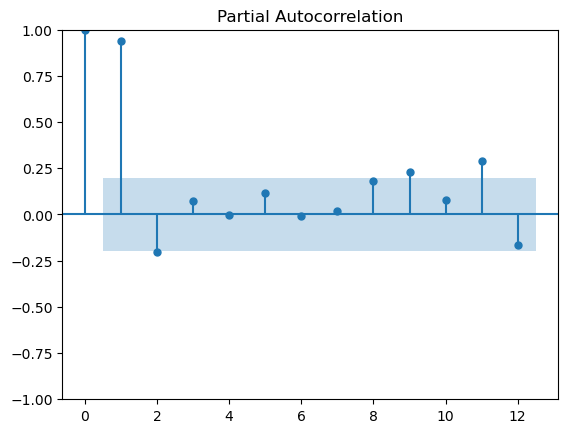

In [35]:
import statsmodels.graphics.tsaplots as tsaplots
tsaplots.plot_acf(air.Passengers,lags=12)
tsaplots.plot_pacf(air.Passengers,lags=12)
plt.show()

### Evaluation Metric MAPE

In [36]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [37]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model=SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test['Passengers'])

23.527467087883835

### Holt method 

In [38]:
from statsmodels.tsa.holtwinters import Holt
holt_model=Holt(train['Passengers']).fit(smoothing_level=0.8,smoothing_trend=0.2)
pred_holt=holt_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_holt,test['Passengers'])

11.233645615592206

### Holts winter exponential smoothing with additive seasonality and additive trend


In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exp_smt_model=ExponentialSmoothing(train['Passengers'],seasonal='add',trend='add',seasonal_periods=12).fit()
pred_exp_smt=exp_smt_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_exp_smt,test['Passengers'])

10.5406685623048

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [40]:
exp_smt_mul_model=ExponentialSmoothing(train['Passengers'],seasonal='mul',trend='add',seasonal_periods=12).fit()
pred_exp_smt_mul=exp_smt_mul_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_exp_smt_mul,test['Passengers'])

11.569523501290915

# Here from Data Driven Models we can see that Holts Winter Exponential Smoothing with additive seasonality and additive Trend has the lowest MAPE value 

<AxesSubplot:>

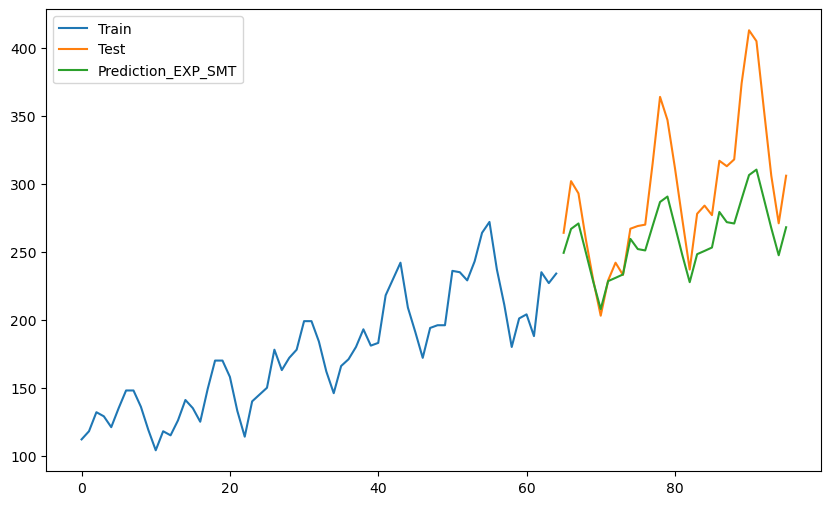

In [41]:
train.Passengers.plot(legend=True,label='Train',figsize=(10,6))
test.Passengers.plot(legend=True,label='Test')
pred_exp_smt.plot(legend=True,label='Prediction_EXP_SMT')

# Base Model

In [42]:
air=pd.read_excel("C:\\Users\\Hi\\Desktop\\Python Datasets\\Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)
air

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [43]:
train=air.head(65)
test=air.tail(31)

In [44]:
# separate out a validation dataset
split_point = len(air) - 10
dataset, validation = air[0:split_point], air[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


In [45]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

C:\Users\Hi\AppData\Local\Temp\ipykernel_1048\1026499641.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


In [46]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>

# 

# ARIMA Hyperparameter Tuning

In [47]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
#p_values=range(0,8)
#d_values=range(0,3)
#q_values=range(0,5)

In [48]:
#pip install pmdarima

In [49]:
train=air.head(64)
test=air.tail(31)

In [50]:
from pmdarima import auto_arima
auto_arima(train,m=12,start_P=0 , seasonal=True,  d=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=379.824, Time=0.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=384.065, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=374.009, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=374.975, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=380.356, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=376.007, Time=0.27 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=376.008, Time=0.17 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=374.988, Time=0.15 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.26 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=377.773, Time=0.10 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=375.982, Time=0.15 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=375.815, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=373.818, Time=0.12 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=380.337, Time=0.07 sec
 ARIMA(0,1,1)(2,1,0)[12]             

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [51]:
model=ARIMA(train,order=(0,1,1)).fit()

In [54]:
pred=model.predict(start=len(train),end=(len(air)-2))

In [55]:
from sklearn.metrics import mean_squared_error
rmse_arima=np.sqrt(mean_squared_error(test,pred))
rmse_arima

85.8787361749469

<AxesSubplot:xlabel='Month'>

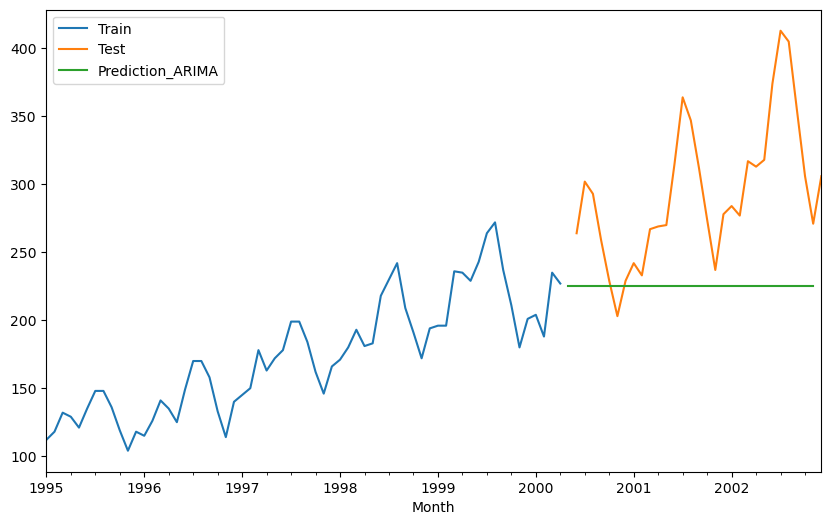

In [56]:
train.Passengers.plot(legend=True,label='Train',figsize=(10,6))
test.Passengers.plot(legend=True,label='Test')
pred.plot(legend=True,label='Prediction_ARIMA')

import itertools
p=range(0,8)
d=range(0,5)
q=range(0,8)
pdq_combination=list(itertools.product(p,d,q))

len(pdq_combination)
rmse=[]
order1=[]
air.shape
train=air.head(64)
test=air.tail(31)
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=train.Passengers[0:],end=train.Passengers[:-1])
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
        
    except:
        continue
